In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('VideoGameSales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.isna().sum()
df = df.dropna()

<AxesSubplot:>

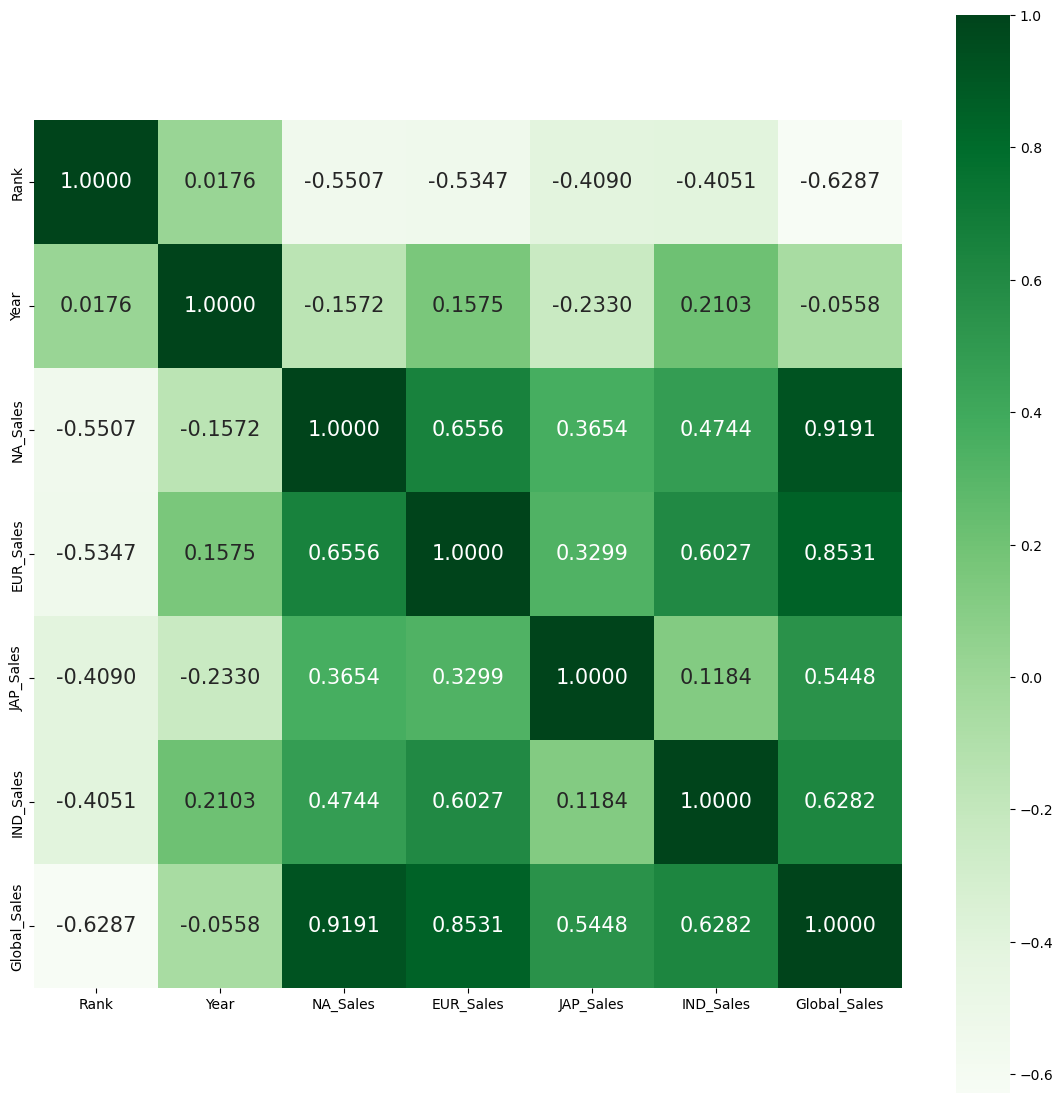

In [4]:
corr = df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, cbar=True, square=True, fmt='.4f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [5]:
df.drop(['Rank', 'Name'], axis=1, inplace = True)

In [6]:
df.shape

(496, 9)

In [7]:
print(len(df['Platform'].unique()))
print(len(df['Genre'].unique()))
print(len(df['Publisher'].unique()))

21
12
33


In [8]:
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# Splitting the dataset
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,2,3])], remainder = 'passthrough')
x_hot = np.array(ct.fit_transform(x))
print(x_hot.shape)

(496, 71)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_hot, y, test_size = 0.30, random_state = 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(347, 71) (149, 71) (347,) (149,)


In [12]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 1, verbose=1)
regressor.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


RandomForestRegressor(n_estimators=200, random_state=1, verbose=1)

In [13]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3.76  3.52]
 [ 4.32  4.31]
 [ 3.6   3.36]
 [ 3.79  3.65]
 [ 3.18  3.18]
 [ 4.43  4.42]
 [ 3.53  3.63]
 [ 4.76  4.68]
 [ 5.34  5.45]
 [ 5.3   5.49]
 [ 9.77  9.76]
 [ 3.65  3.6 ]
 [13.91 14.03]
 [18.71 14.64]
 [ 3.73  3.54]
 [ 5.35  6.05]
 [ 5.04  4.85]
 [ 3.15  2.99]
 [ 3.28  3.23]
 [ 4.96  4.96]
 [ 3.21  2.96]
 [ 4.12  4.06]
 [ 6.71 11.66]
 [ 8.27  8.06]
 [ 3.67  3.66]
 [ 4.35  3.89]
 [ 3.69  3.73]
 [ 3.64  3.64]
 [ 3.54  3.48]
 [ 4.35  4.68]
 [ 3.18  3.11]
 [ 3.26  3.13]
 [ 6.36  6.5 ]
 [ 4.55  4.16]
 [ 4.61  4.17]
 [22.57 31.37]
 [ 5.07  5.  ]
 [ 4.6   4.61]
 [ 3.78  3.78]
 [ 3.42  3.19]
 [ 3.79  3.76]
 [ 8.28  9.72]
 [ 3.13  3.27]
 [ 4.1   4.38]
 [ 9.5   9.88]
 [ 4.01  4.06]
 [ 6.13  6.24]
 [ 7.08  6.81]
 [ 3.78  3.78]
 [ 3.74  3.65]
 [30.54 30.26]
 [ 3.51  3.22]
 [ 6.82  6.73]
 [ 3.62  3.61]
 [ 4.41  3.72]
 [ 3.94  4.01]
 [23.82 20.81]
 [ 4.69  5.17]
 [ 3.83  2.98]
 [ 3.2   2.99]
 [ 3.18  3.15]
 [ 3.17  2.9 ]
 [ 5.72  5.99]
 [10.25  9.59]
 [ 4.56  4.44]
 [ 3.48  3.81]
 [ 3.28  3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [15]:
# Evaluating the Model Performance

y_pred_train = regressor.predict(x_train)

print('R^2 (Train-Set) = ', metrics.r2_score(y_train, y_pred_train))
print('R^2 (Test_Set) = ', metrics.r2_score(y_test, y_pred))

print('Adjusted R^2 (Train-Set) = ', 1 - (1 - metrics.r2_score(y_train, y_pred_train)))
print('Adjusted R^2 = ', 1 - (1 - metrics.r2_score(y_test, y_pred)))

print('MAE (Train-Set) = ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE (Test_Set) = ', metrics.mean_absolute_error(y_test, y_pred))

print('MSE (Train-Set) = ', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE (Test_Set) = ', metrics.mean_squared_error(y_test, y_pred))

print('RMSE (Train-Set) = ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE (Test_Set) = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2 (Train-Set) =  0.9762019355609148
R^2 (Test_Set) =  0.9391110407313774
Adjusted R^2 (Train-Set) =  0.9762019355609148
Adjusted R^2 =  0.9391110407313774
MAE (Train-Set) =  0.24700590778098033
MAE (Test_Set) =  0.5524721476510073
MSE (Train-Set) =  1.0183611810735034
MSE (Test_Set) =  1.6180485755536957
RMSE (Train-Set) =  1.0091388314169183
RMSE (Test_Set) =  1.272025383219099


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


C:\Users\omidh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


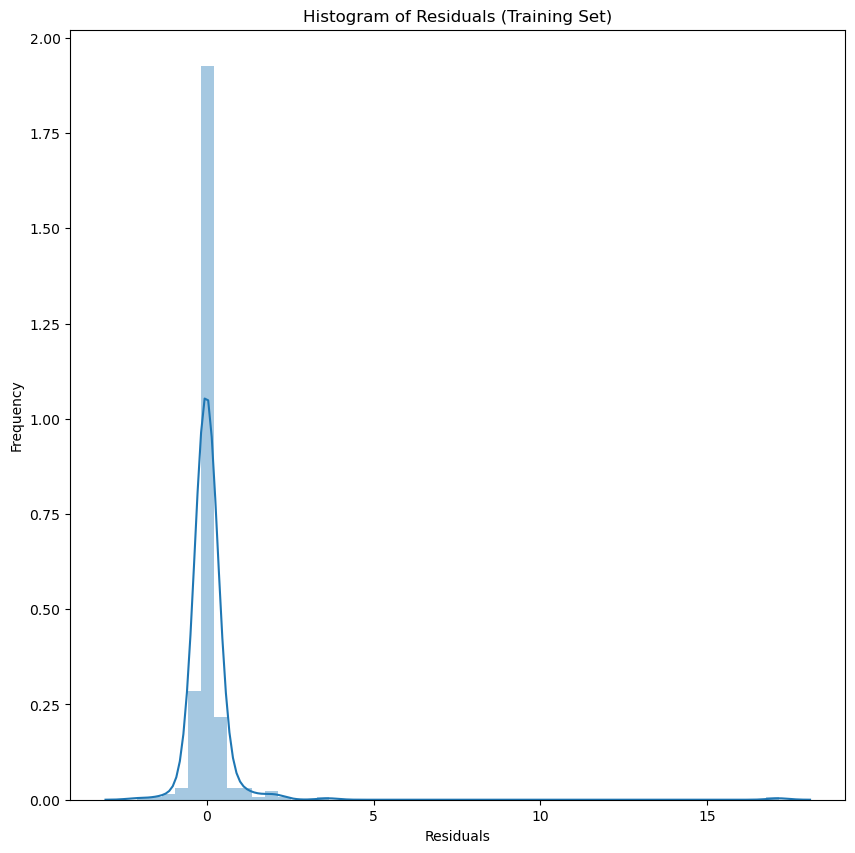

In [16]:
# Checking normality of the errors for training set

plt.figure(figsize = (10,10))
sns.distplot(y_train - y_pred_train)
plt.title("Histogram of Residuals (Training Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

C:\Users\omidh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


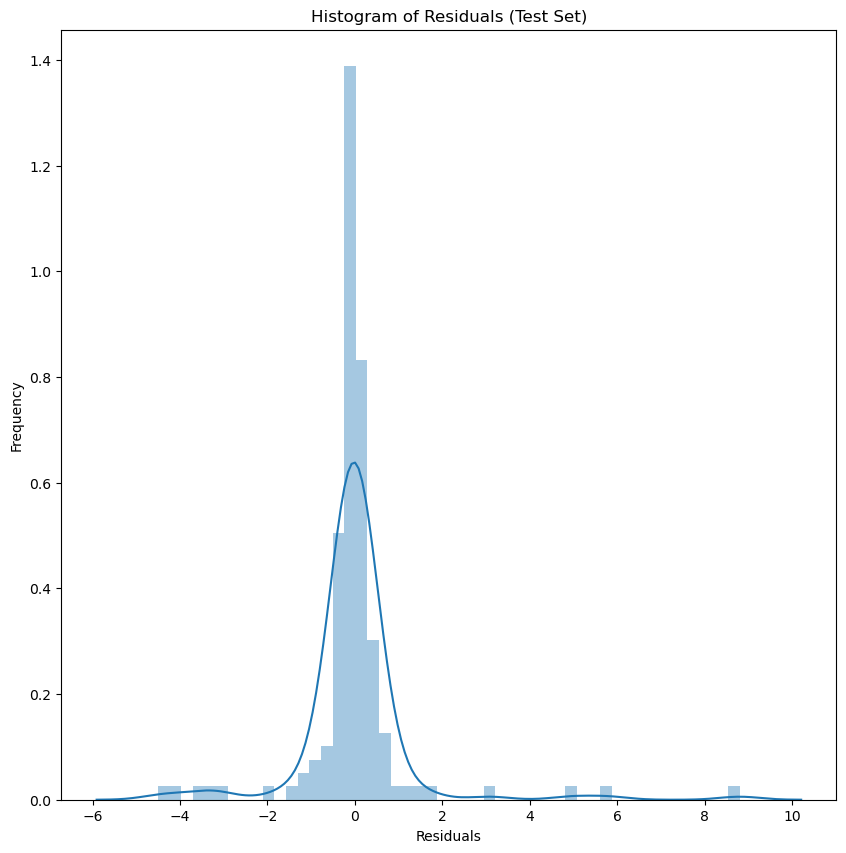

In [17]:
plt.figure(figsize = (10,10))
sns.distplot(y_test - y_pred)
plt.title("Histogram of Residuals (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()